# Desafios na Análise de Dados de Alta Dimensionalidade para Diagnóstico de Câncer

No contexto da medicina diagnóstica, a Alura_care, uma startup fictícia, surge com a missão de reduzir o número de exames necessários para diagnosticar um tipo específico de câncer. Para atingir esse objetivo, o projeto enfrenta os desafios dos dados de alta dimensionalidade, onde a quantidade de variáveis supera o número de observações.

O pré-processamento dos dados envolve identificar e tratar células vazias e valores constantes, enquanto a análise da correlação entre variáveis permite compreender sua influência no processo de classificação. Além disso, a seleção automática de features, utilizando técnicas como SelectKBest e RFE, é essencial para determinar o conjunto mais relevante de variáveis para o diagnóstico do câncer em questão.

Por fim, técnicas de visualização de dados em alta dimensionalidade são empregadas para reduzir a complexidade dos dados, mantendo o máximo de informações. Essa visualização intuitiva permite identificar padrões e relações nos dados, facilitando a interpretação e a tomada de decisões na Alura_care, com o objetivo final de melhorar os resultados diagnósticos e a qualidade de vida dos pacientes.

<img src="imagem.png" width="650">


Temos 33 dimensões nessa base de dados e o objetivo é responder: **será possível reduzirmos a necessidade de tantos exames para chegar a um diagnóstico de maneira efetiva?**

Fonte dos dados originais: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic


## Importação das bibliotecas

In [1]:
import pandas as pd
from numpy import random

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.feature_selection import SelectKBest, chi2, RFE, RFECV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Funções necessárias para o projeto

In [2]:
def grafico_violino(valores, inicio, fim):
    dados_plot = pd.concat([diagnostico, valores.iloc[:, inicio:fim]], axis = 1)
    dados_plot = pd.melt(dados_plot, id_vars = 'diagnostico', var_name = 'exames', value_name = 'valores')

    plt.figure(figsize = (10, 6))
    sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split = True,
                   linewidth = 1, width = 0.9, inner = 'quartile')  # Ajustes feitos aqui
    plt.xticks(rotation=90)
    plt.title('Distribuição dos Valores dos Exames por Diagnóstico')
    plt.xlabel('Exames')
    plt.ylabel('Valores')
    plt.legend(title='Diagnóstico')
    plt.show()

## Importando o dataset

In [3]:
resultados_exames = pd.read_csv('dados_exames.csv')
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


Exclusão da coluna id porque não contém informações relevantes para as análises seguintes.

In [4]:
resultados_exames = resultados_exames.drop(['id'], axis = 1)

In [5]:
resultados_exames.columns

Index(['diagnostico', 'exame_1', 'exame_2', 'exame_3', 'exame_4', 'exame_5',
       'exame_6', 'exame_7', 'exame_8', 'exame_9', 'exame_10', 'exame_11',
       'exame_12', 'exame_13', 'exame_14', 'exame_15', 'exame_16', 'exame_17',
       'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22', 'exame_23',
       'exame_24', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_29',
       'exame_30', 'exame_31', 'exame_32', 'exame_33'],
      dtype='object')

In [6]:
resultados_exames.shape

(569, 34)

In [7]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 34 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   diagnostico  569 non-null    object 
 1   exame_1      569 non-null    float64
 2   exame_2      569 non-null    float64
 3   exame_3      569 non-null    float64
 4   exame_4      569 non-null    float64
 5   exame_5      569 non-null    float64
 6   exame_6      569 non-null    float64
 7   exame_7      569 non-null    float64
 8   exame_8      569 non-null    float64
 9   exame_9      569 non-null    float64
 10  exame_10     569 non-null    float64
 11  exame_11     569 non-null    float64
 12  exame_12     569 non-null    float64
 13  exame_13     569 non-null    float64
 14  exame_14     569 non-null    float64
 15  exame_15     569 non-null    float64
 16  exame_16     569 non-null    float64
 17  exame_17     569 non-null    float64
 18  exame_18     569 non-null    float64
 19  exame_19

## Tratamentos, testes e resultados

Para todos os resultados será utilizado o modelo de Random Forest.

### Teste 1. Dados nulos

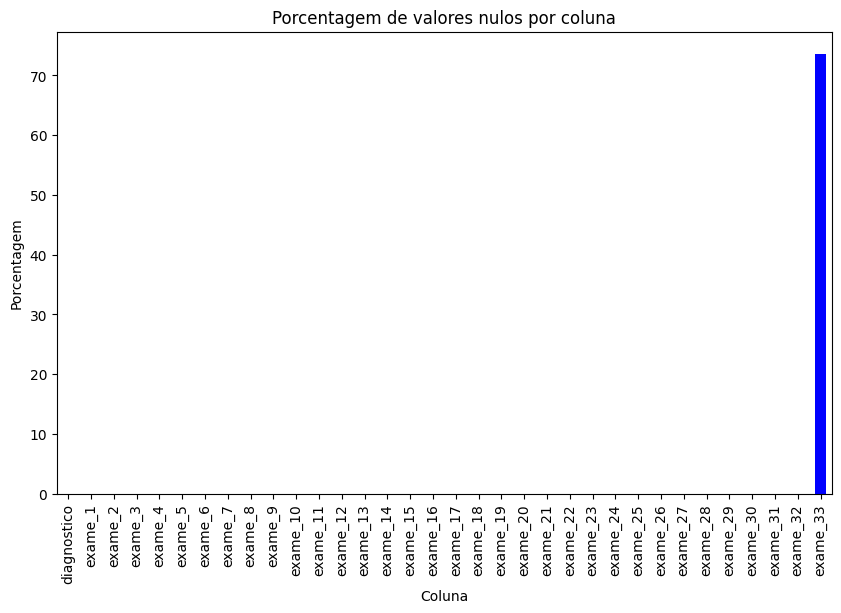

In [8]:
porcentagem = (resultados_exames.isna().sum() / len(resultados_exames)) * 100

plt.figure(figsize = (10, 6))
porcentagem.plot(kind = 'bar', color = 'b')
plt.title('Porcentagem de valores nulos por coluna')
plt.xlabel('Coluna')
plt.ylabel('Porcentagem')
plt.show()

Mais de 70% dos dados do exame_33 são nulos então essa coluna será excluída porque a falta de informações pode distorcer as análises e modelos.

In [9]:
SEED = 1231
random.seed(SEED)

valores_exames = resultados_exames.drop(['diagnostico'], axis = 1)
diagnostico = resultados_exames['diagnostico']
valores_exames_v1 = valores_exames.drop(['exame_33'], axis = 1)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)

acuracia_teste_1 = round(classificador.score(teste_x, teste_y) * 100, 2)
print(f'Resultado da classificação: {acuracia_teste_1}%')

Resultado da classificação: 96.49%


### Teste Dummies

Utilização do Dummies para comparar se o resultado anterior é bom para ser usado como baseline quando for reduzir a dimensionalidade. 
A estratégia que será utilizada é do diagnóstico com mais frequente.

In [10]:
SEED = 1231
random.seed(SEED)

classificador_dummies = DummyClassifier(strategy = 'most_frequent')
classificador_dummies.fit(treino_x, treino_y)
acuracia_dummies = round(classificador_dummies.score(teste_x, teste_y) * 100, 2)
print(f'Resultado da classificação: {acuracia_dummies}%')

Resultado da classificação: 65.5%


Como o valor do Dummies ficou muito abaixo, podemos utilizar o valor do teste 1 como baseline, o valor é de 96.49%

### Teste 2. Dados constante

Utilizaremos o gráfico de violino para visualizar a distribuição dos dados malignos (M) e benignos (B) em relação a cada atributo.
Para utilizar esse gráfico será necessário fazer o pré-processamento para normalizar os dados e reorganiznado o formato do DataFrame.

In [11]:
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

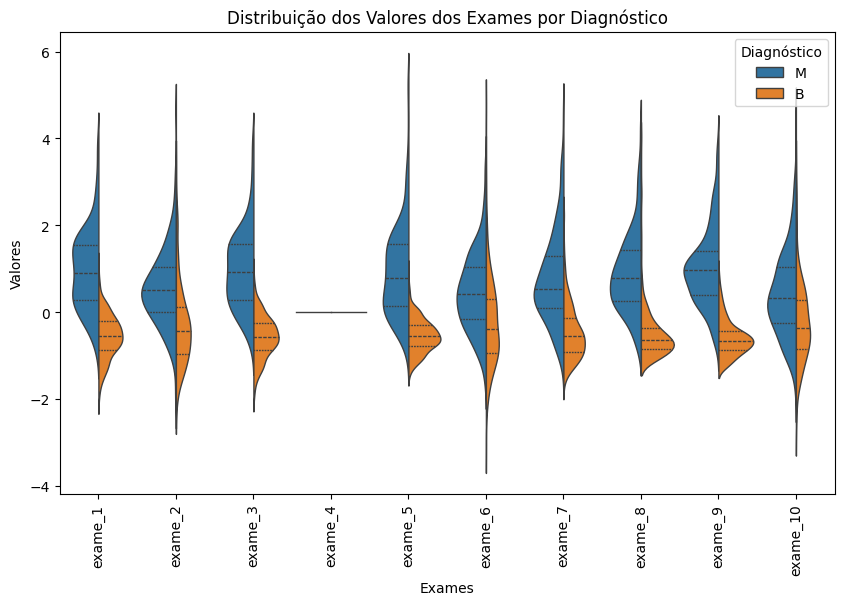

In [12]:
grafico_violino(valores_exames_v2, 0, 10)

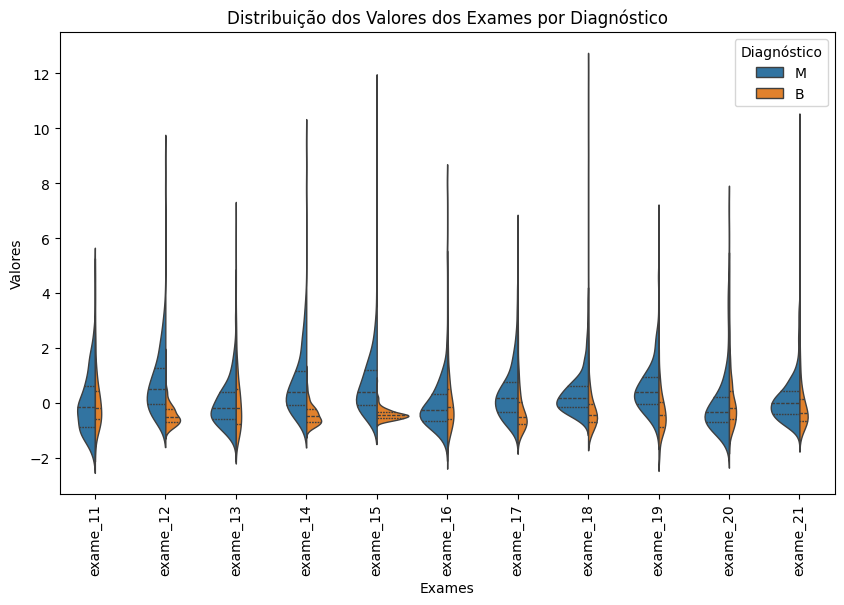

In [13]:
grafico_violino(valores_exames_v2, 10, 21)

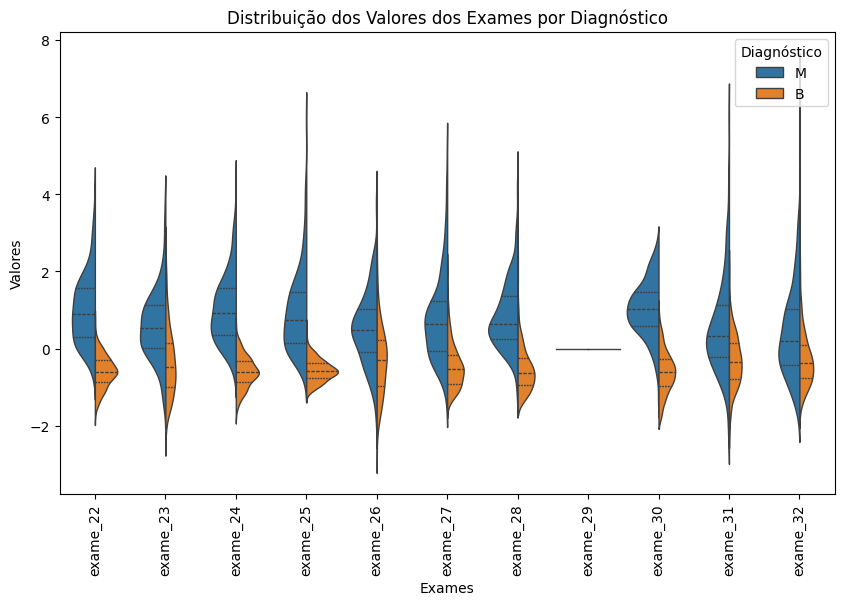

In [14]:
grafico_violino(valores_exames_v2, 21, 32)

In [15]:
valores_exames_v2[['exame_4', 'exame_29']].describe()

,exame_4,exame_29
count,5.690000e+02,5.690000e+02
mean,1.421085e-14,1.110223e-16
std,0.000000e+00,0.000000e+00
min,1.421085e-14,1.110223e-16
25%,1.421085e-14,1.110223e-16
50%,1.421085e-14,1.110223e-16
75%,1.421085e-14,1.110223e-16
max,1.421085e-14,1.110223e-16


Os exames 4 e 29 são valores constantes, ou seja, não está impactando nos nossos resultados, podemos então eliminar essas features.

In [16]:
valores_exames_v3 = valores_exames_v2.drop(['exame_4', 'exame_29'], axis = 1)

In [17]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v3, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
acuracia_teste_2 = round(classificador.score(teste_x, teste_y) * 100, 2)
print(f'Resultado da classificação: {acuracia_teste_2}%')

Resultado da classificação: 92.98%


### Teste 3. Dados altamente correlacionados

Matriz de correlação

<Axes: >

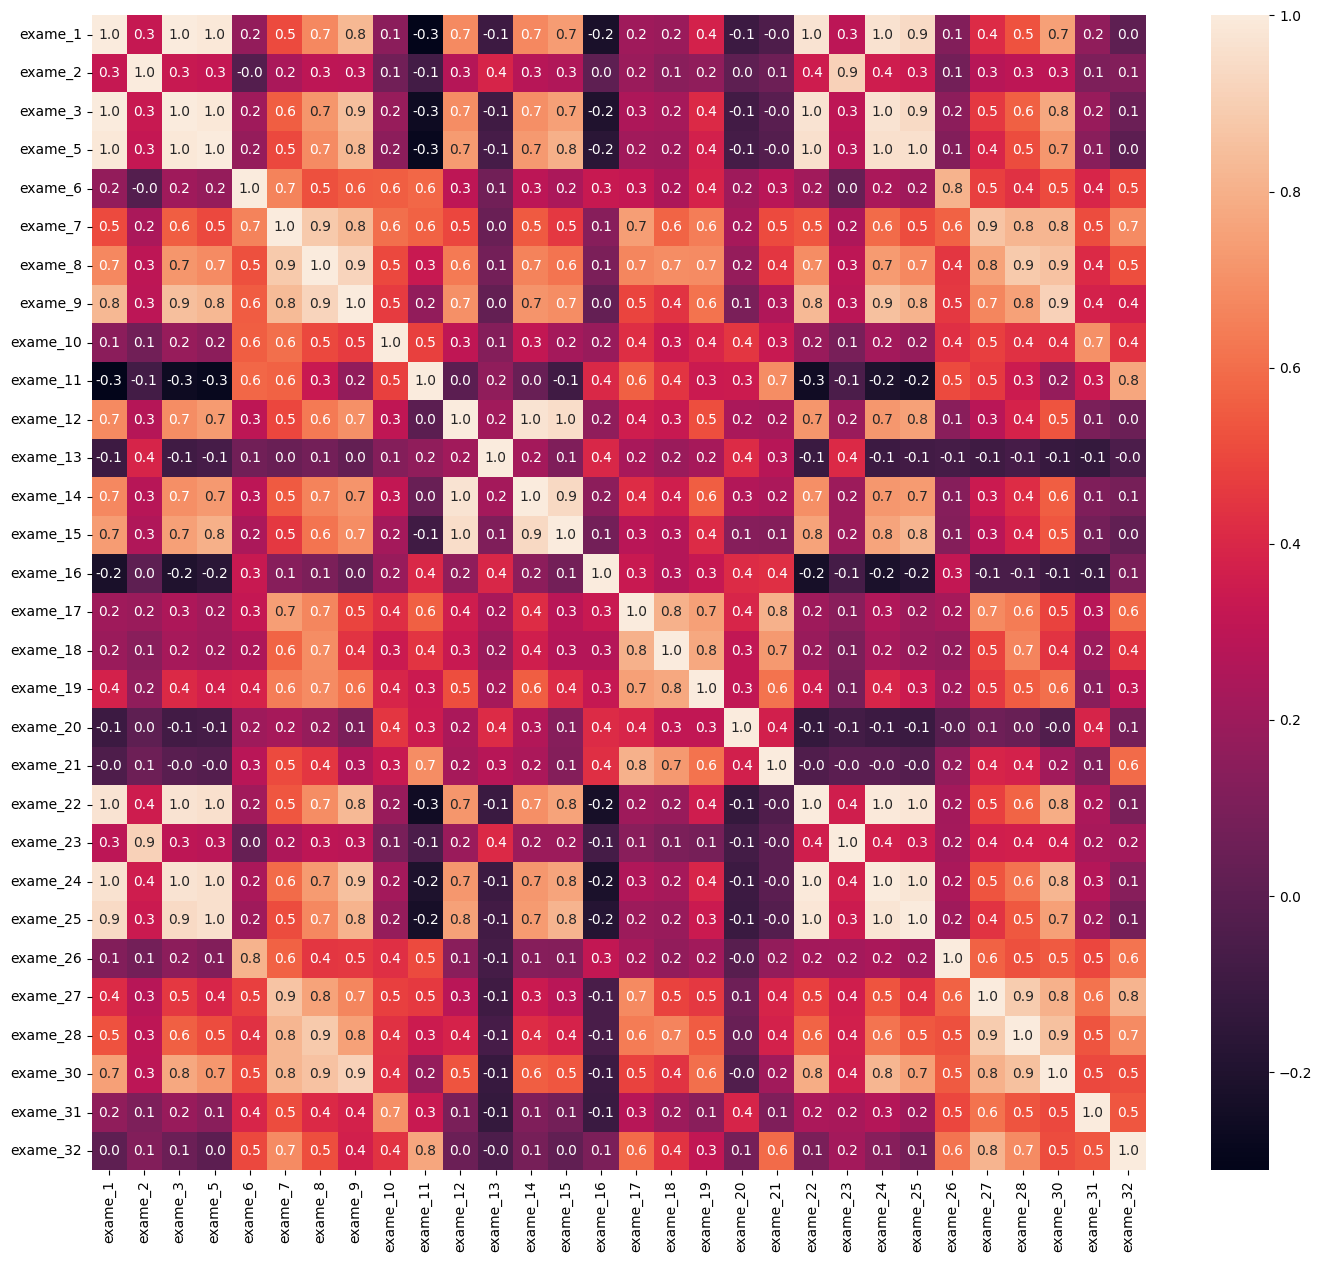

In [18]:
matriz_correlacao = valores_exames_v3.corr()
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao, annot = True, fmt = '.1f')

# annot = valor da correlação dentro de cada quadrado
# fmt = casa decimal do annot

<Axes: >

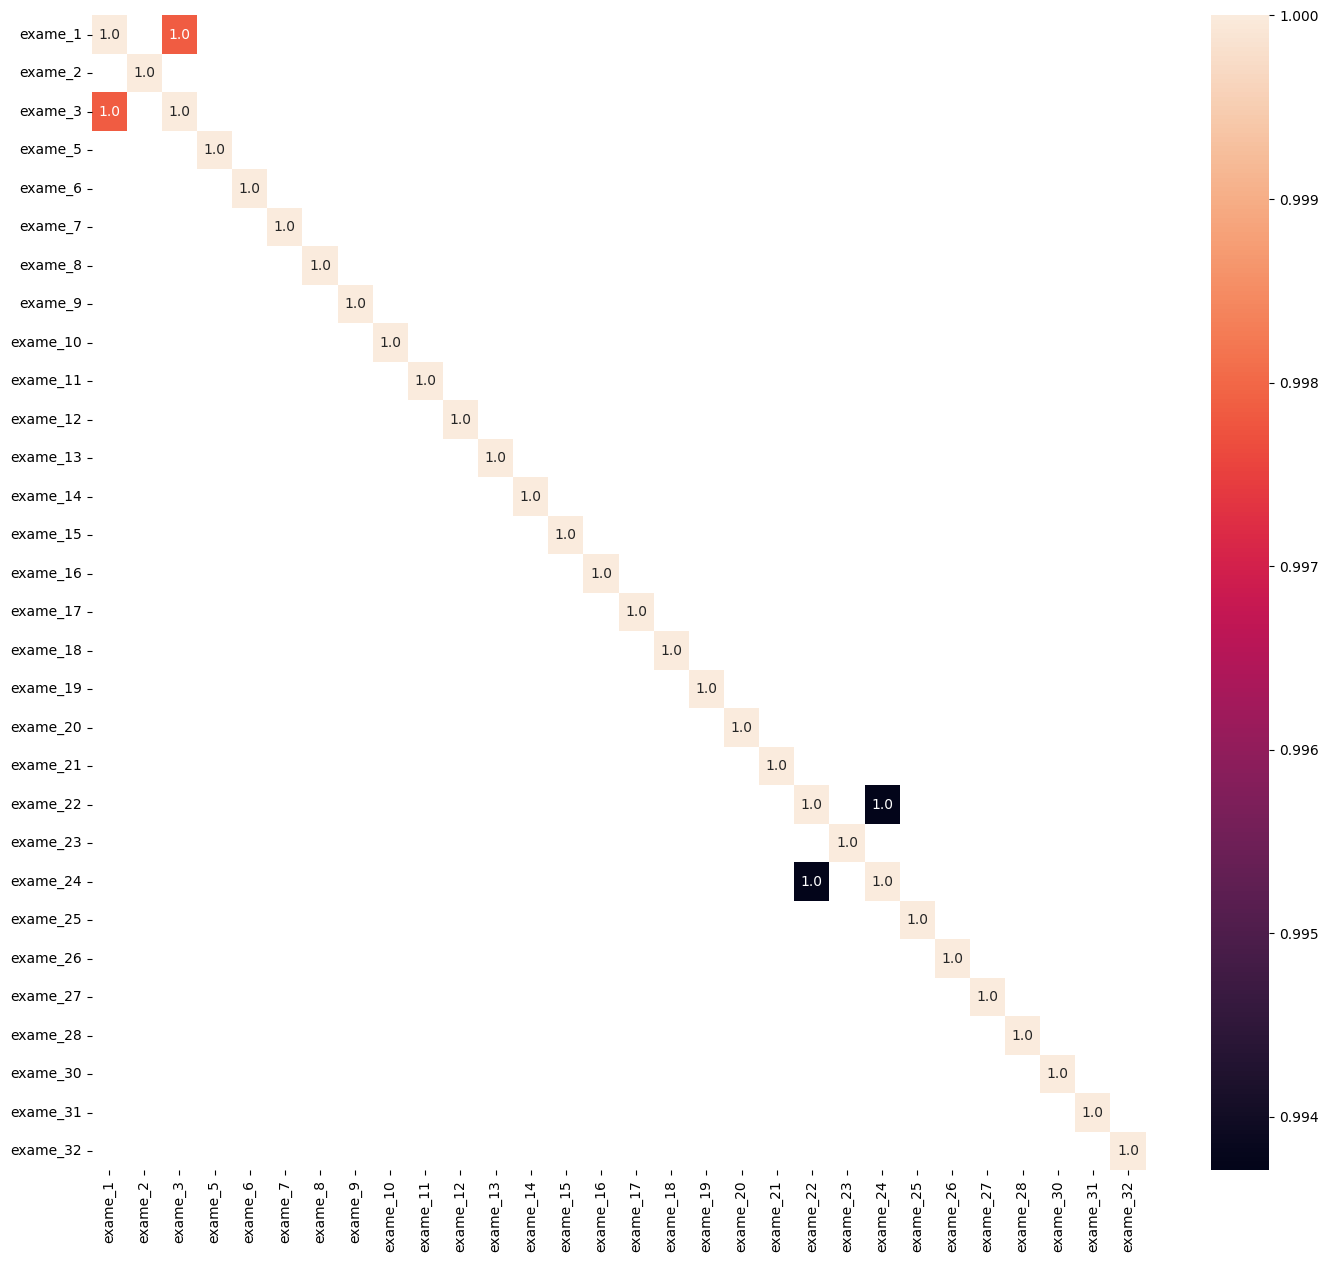

In [19]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
plt.figure(figsize = (17, 15))
sns.heatmap(matriz_correlacao_v1, annot = True, fmt = '.1f')

In [20]:
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacionadas = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacionadas

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

Através da imagem da matriz de correlação e da seleção das variáveis nota-se que o exame_1 e o exame_3 são altamente correlacionados, igualmente o exame_22 com o exame 24.
Será feita então a exclusão de um dos exames de cada dupla identificada para não ocorrer a redundancia de valores e também evitar que aconteça overfitting.

In [21]:
valores_exames_v5 = valores_exames_v3.drop(['exame_3', 'exame_24'], axis = 1)

SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
acuracia_teste_3 = round(classificador.score(teste_x, teste_y) * 100, 2)
print(f'Resultado da classificação: {acuracia_teste_3}%')

Resultado da classificação: 92.98%


### Teste 4. Seleção das K melhores features

Os teste 1, 2 e 3 foram realizados com seleções manuais, a partir de agora as seleções serão feitas de forma automática.
Será utilizada a técnica que seleciona os melhores atributos de acordo com uma métrica específica, nesse caso será o qui-quadrado.

In [22]:
selecionar_kmelhores = SelectKBest(chi2, k = 5) # selecionar as 5 melhores features de acordo com nossa função chi2
selecionar_kmelhores

SelectKBest(k=5, score_func=<function chi2 at 0x0000019415B69260>)

In [23]:
# treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v5, diagnostico, test_size = 0.3)
# selecionar_kmelhores.fit(treino_x, treino_y)

Quando rodou esse código deu erro porque o chi2 não aceita valores negativos e em valores_exames_v5 possui números negativos, então vamos voltar para os dados antes da normalização e fazer todas as remorções que fizemos até chegar no valores_exames_v5.

In [24]:
valores_exames_v6 = valores_exames_v1.drop(['exame_4', 'exame_29', 'exame_3', 'exame_24'], axis = 1)

In [25]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_kbest, treino_y)
acuracia_teste_4 = round(classificador.score(teste_kbest, teste_y) * 100, 2)
print(f'Resultado da classificação: {acuracia_teste_4}%')

Resultado da classificação: 92.4%


Nosso último resultado mostrou uma acurácia de 92.98% após a exclusão de apenas 4 atributos. Agora, ao utilizar somente 5 atributos, alcançamos uma acurácia ligeiramente menor de 92.40%, mas com uma redução significativa de 85% no tamanho do conjunto de dados. Do ponto de vista de custo, isso parece um sucesso, certo?

No entanto, avaliar apenas a acurácia pode não ser suficiente para uma análise completa. Seria mais vantajoso realizar uma análise mais detalhada dos dados, podendo considerar outras métricas de desempenho. 

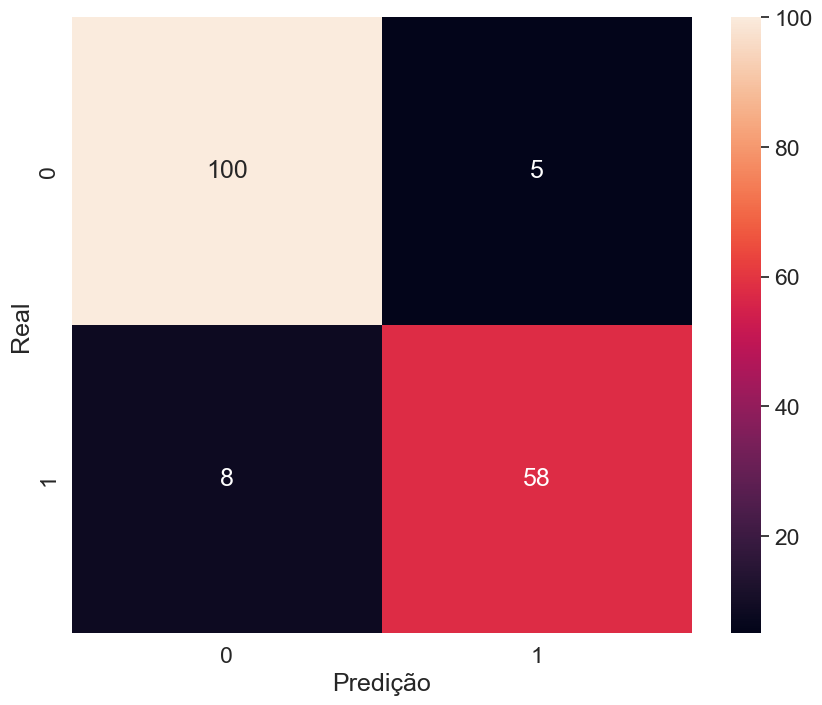

In [26]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real');


Examinar a matriz de confusão é fundamental, especialmente na área da saúde, onde as consequências de erros de classificação podem ser significativas. Se uma pessoa realmente estiver com câncer, mas for erroneamente diagnosticada como saudável, isso pode resultar em atrasos no tratamento, afetando diretamente suas chances de recuperação.

Analisar essas categorias da matriz de confusão nos permite identificar onde nosso modelo está acertando e onde está falhando. No contexto do projeto, queremos minimizar os falsos negativos, pois esses são os casos em que o modelo falha em identificar corretamente uma condição grave.

### Teste 5. Seleção com RFE

O RFE é um método que funciona removendo recursivamente as características menos importantes do conjunto de dados. 

In [27]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_rfe, treino_y)
acuracia_teste_5 = round(classificador.score(teste_rfe, teste_y) * 100, 2)
print(f'Resultado da classificação: {acuracia_teste_5}%')

Resultado da classificação: 90.06%


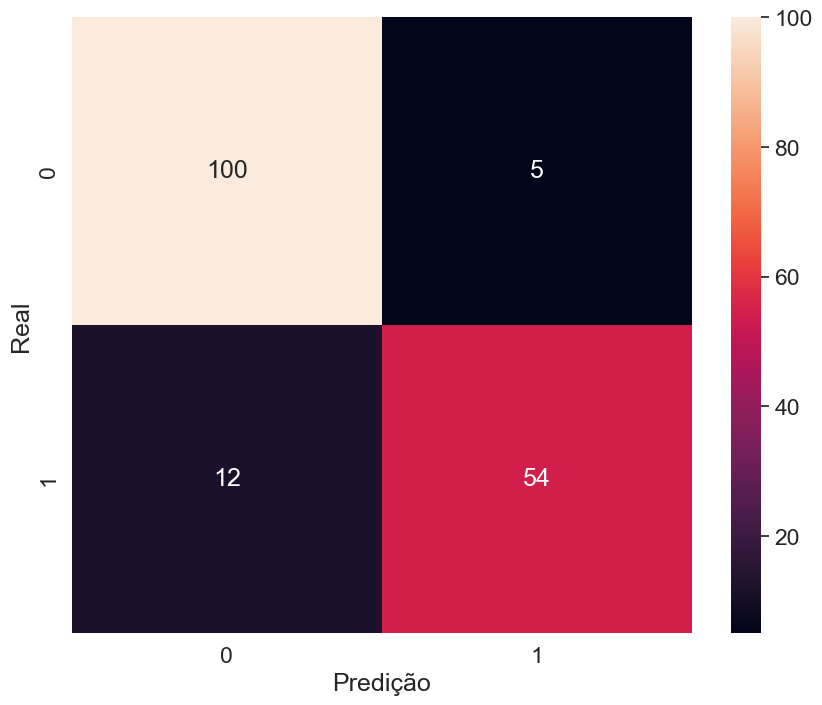

In [28]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real');

### Teste 6. Seleção com RFECV

Enquanto o RFE realiza a eliminação recursiva de características com base em suas importâncias relativas, o RFECV adiciona a validação cruzada para uma seleção mais robusta de características, levando em conta o desempenho geral do modelo.

In [29]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

selecionador_rfecv = RFECV(estimator = classificador, cv = 5, scoring = 'accuracy', step = 1) # cv → número de divisões (folders)
selecionador_rfecv.fit(treino_x, treino_y)
treino_rfecv = selecionador_rfecv.transform(treino_x)
teste_rfecv = selecionador_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)

print(f'Resultado da classificação: {classificador.score(teste_rfecv, teste_y) * 100:.2f}%')

Resultado da classificação: 92.98%


[Text(0.5, 49.249999999999986, 'Predição'), Text(86.25, 0.5, 'Real')]

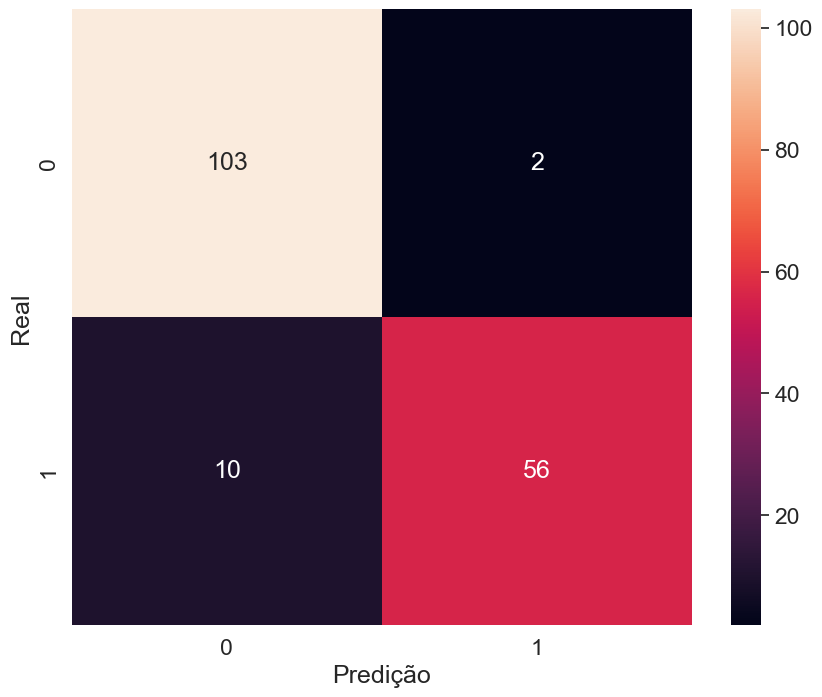

In [30]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

Quantidade de feature que a seleção determina que são as melhores e quais são elas.

In [31]:
selecionador_rfecv.n_features_

26

In [32]:
selecionador_rfecv.support_
treino_x.columns[selecionador_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [33]:
selecionador_rfecv.cv_results_['mean_test_score'] 

array([0.86936709, 0.93205696, 0.94727848, 0.94474684, 0.95231013,
       0.94974684, 0.95227848, 0.96234177, 0.94727848, 0.95224684,
       0.95981013, 0.96234177, 0.96484177, 0.96231013, 0.96234177,
       0.96231013, 0.96734177, 0.95731013, 0.96734177, 0.95984177,
       0.95734177, 0.94981013, 0.96484177, 0.95481013, 0.95231013,
       0.96981013, 0.96231013, 0.95984177])

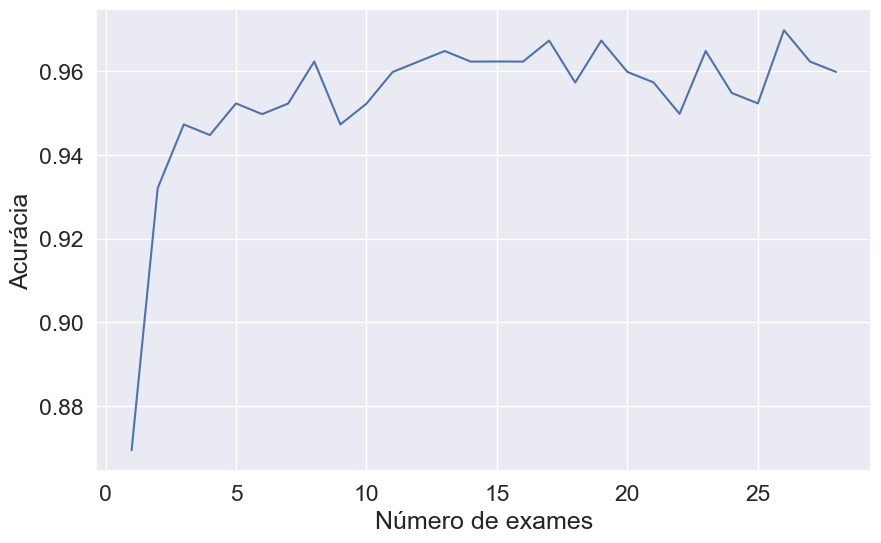

In [34]:
plt.figure(figsize = (10, 6))
plt.xlabel("Número de exames")
plt.ylabel("Acurácia")

plt.plot(range(1, len(selecionador_rfecv.cv_results_['mean_test_score']) + 1), selecionador_rfecv.cv_results_['mean_test_score'])
plt.show()

O gráfico mostra que o número ideal de características para alcançar o maior score é 26. No entanto, ao observar a acurácia máxima de 97%, é importante entender que esse valor não corresponde diretamente à acurácia máxima alcançada em um único teste. A acurácia reportada, muitas vezes, é uma média dos scores obtidos em diferentes blocos durante a validação cruzada, não refletindo necessariamente o desempenho máximo em um único teste. Portanto, embora o gráfico sugira uma acurácia de 97% para 26 características, a acurácia real pode ser diferente, como exemplificado pela sua máxima de 94.15%.

## Visualizando dados no plano

Quando utilizamos o RFE e optarmos por selecionar apenas duas características, podemos então plotar um gráfico de dispersão (scatter plot) dessas duas características em relação ao target, o que nos permite visualizar como os dados estão distribuídos e se há alguma relação aparente entre as características selecionadas e o target.

In [35]:
resultados_exames

,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.30010,0.14710,...,184.60,2019.0,0.16220,0.66560,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.08690,0.07017,...,158.80,1956.0,0.12380,0.18660,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.19740,0.12790,...,152.50,1709.0,0.14440,0.42450,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.24140,0.10520,...,98.87,567.7,0.20980,0.86630,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.19800,0.10430,...,152.20,1575.0,0.13740,0.20500,0.4000,0.786,0.1625,0.2364,0.07678,0.854454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,103.78,1479.0,0.11100,0.11590,0.24390,0.13890,...,166.10,2027.0,0.14100,0.21130,0.4107,0.786,0.2216,0.2060,0.07115,0.158771
565,M,20.13,28.25,131.20,103.78,1261.0,0.09780,0.10340,0.14400,0.09791,...,155.00,1731.0,0.11660,0.19220,0.3215,0.786,0.1628,0.2572,0.06637,NaN
566,M,16.60,28.08,108.30,103.78,858.1,0.08455,0.10230,0.09251,0.05302,...,126.70,1124.0,0.11390,0.30940,0.3403,0.786,0.1418,0.2218,0.07820,NaN
567,M,20.60,29.33,140.10,103.78,1265.0,0.11780,0.27700,0.35140,0.15200,...,184.60,1821.0,0.16500,0.86810,0.9387,0.786,0.2650,0.4087,0.12400,NaN


In [36]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size = 0.3)

classificador = RandomForestClassifier(n_estimators = 100, random_state = 1234)
classificador.fit(treino_x, treino_y)

selecionador_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selecionador_rfe.fit(treino_x, treino_y)
treino_rfe = selecionador_rfe.transform(treino_x)
teste_rfe = selecionador_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)

print(f'Resultado da classificação: {classificador.score(teste_rfe, teste_y) * 100:.2f}%')

Resultado da classificação: 87.13%


[Text(0.5, 49.249999999999986, 'Predição'), Text(86.25, 0.5, 'Real')]

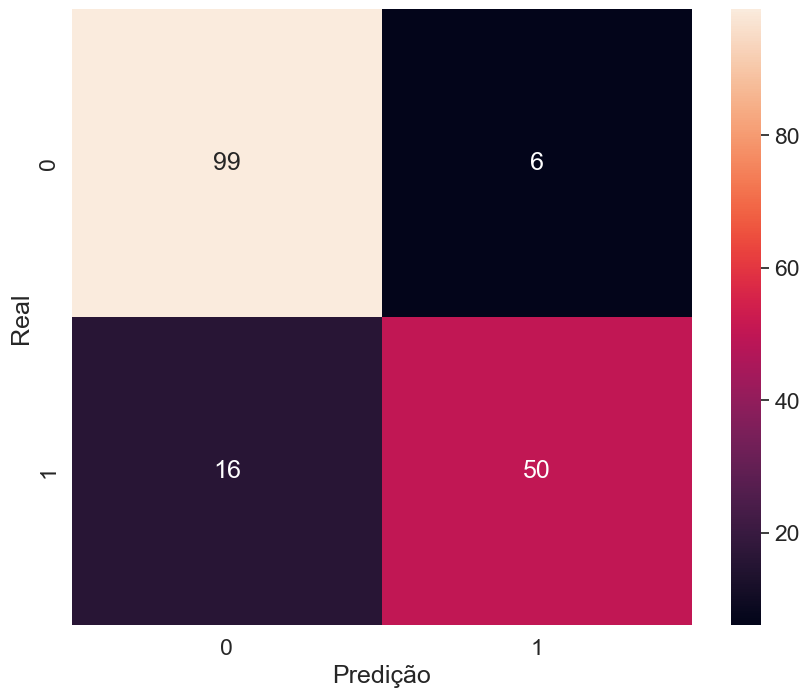

In [37]:
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))

plt.figure(figsize = (10, 8))
sns.set(font_scale = 1.5)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

In [38]:
valores_exames_v7 = selecionador_rfe.transform(valores_exames_v6)
valores_exames_v7.shape

(569, 2)

In [39]:
valores_exames_v7

array([[0.1471 , 0.2654 ],
       [0.07017, 0.186  ],
       [0.1279 , 0.243  ],
       ...,
       [0.05302, 0.1418 ],
       [0.152  , 0.265  ],
       [0.     , 0.     ]])

<Axes: >

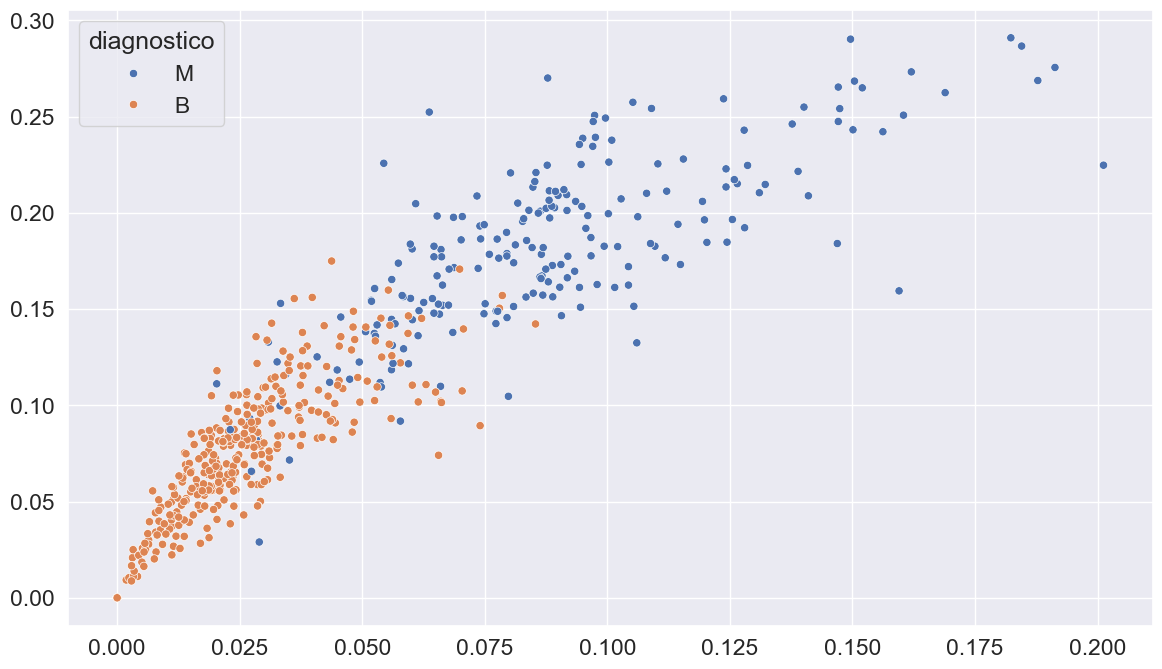

In [40]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x = valores_exames_v7[:, 0], y = valores_exames_v7[:, 1], hue = diagnostico)

A exclusão de muitas dimensões sobrando apenas duas características para visualizações resulta em uma perda significativa de informações. Nesses casos, uma abordagem mais eficaz para preservar o máximo de informações em dimensionalidades reduzidas é o uso do PCA (Principal Component Analysis). O PCA é uma técnica que realiza uma transformação matemática nos dados, onde as primeiras dimensões retêm o maior volume possível de informação.

### PCA

O PCA é uma técnica que realiza uma transformação matemática nos dados, onde as primeiras dimensões retêm o maior volume possível de informação, permitindo explorar as relações entre as características de forma mais eficaz do que simplesmente selecionar duas características.

In [47]:
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v6)

In [48]:
valores_exames_v8 # conjunto dos dados reduzidos a 2 dimensões

array([[1157.37688421, -293.81017696],
       [1267.4687997 ,   15.91568628],
       [ 994.05000153,   39.07405468],
       ...,
       [ 313.54257115,   47.32093974],
       [1121.40671014,   33.68512999],
       [-769.01504719,  -87.76799118]])

<Axes: >

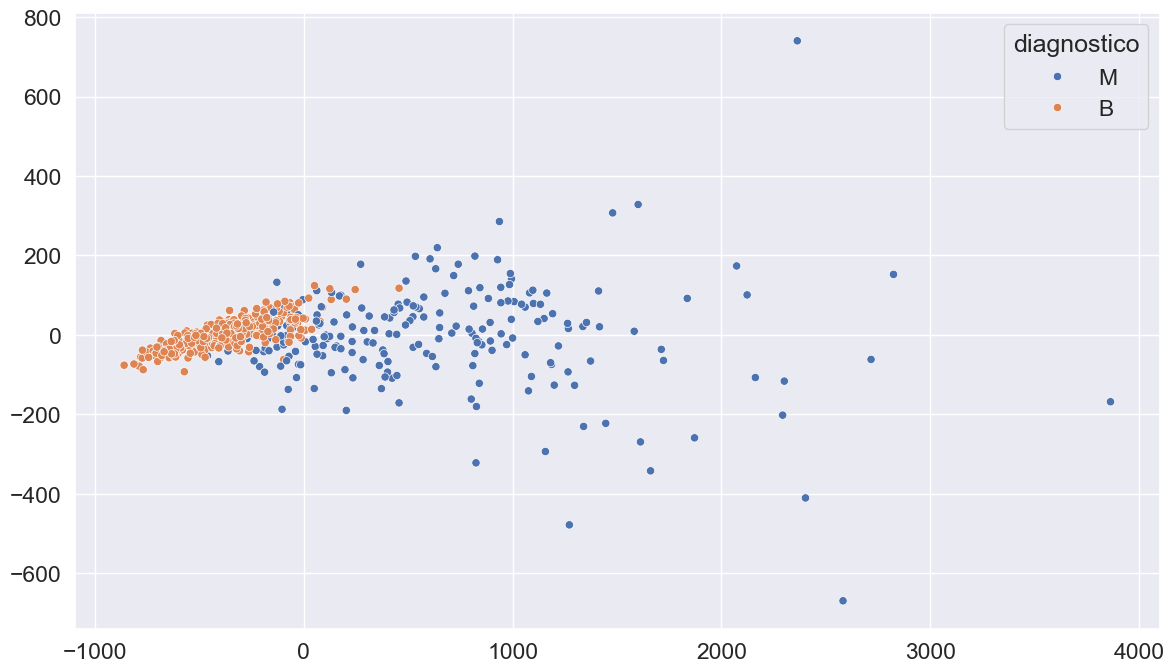

In [49]:
plt.figure(figsize = (14, 8))
sns.scatterplot(x = valores_exames_v8[:, 0], y = valores_exames_v8[:, 1], hue = diagnostico)

PCA vai se comportar melhor com os dados padronizados, então utilizaremos a versão 5 (valores_exames_v5) do nosso dataset onde os dados estão padronizados.

In [50]:
valores_exames_v5

,exame_1,exame_2,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,exame_11,exame_12,...,exame_21,exame_22,exame_23,exame_25,exame_26,exame_27,exame_28,exame_30,exame_31,exame_32
0,1.097064,-2.073335,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,...,0.907083,1.886690,-1.359293,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,...,-0.099444,1.805927,-0.369203,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,...,0.293559,1.511870,-0.023974,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,...,2.047511,-0.281464,0.133984,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,...,0.499328,1.298575,-1.466770,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027,2.782080,...,0.167980,1.901185,0.117700,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,...,-0.490556,1.536720,2.047399,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,...,0.036727,0.561361,1.374854,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,...,0.904057,1.961239,2.237926,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635


<Axes: >

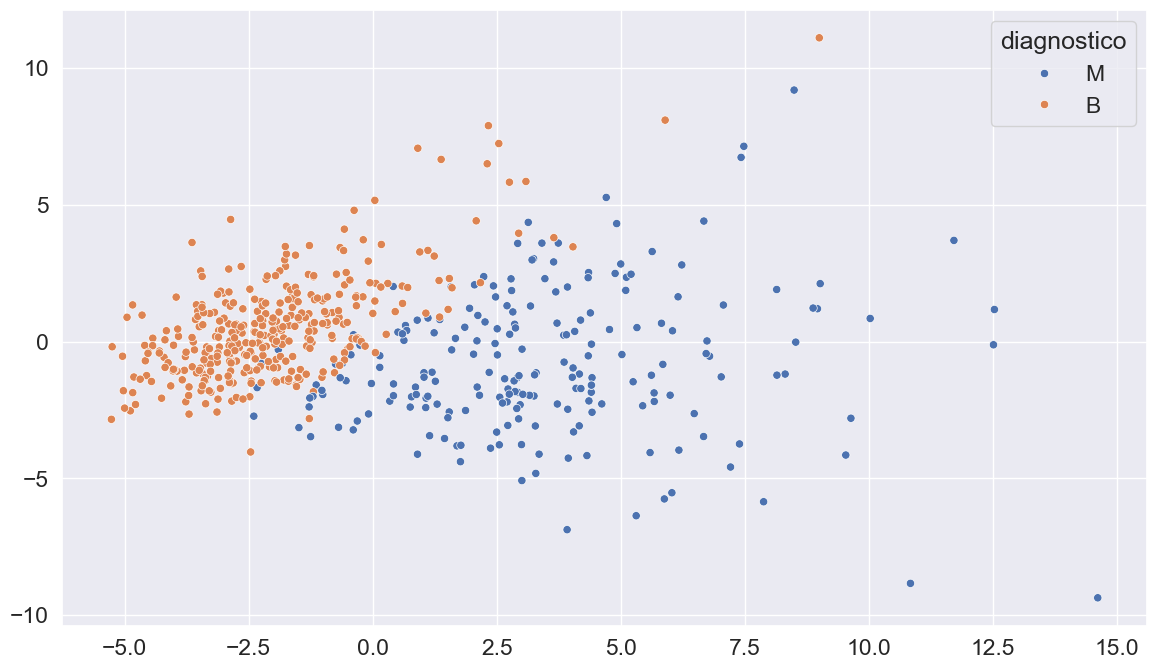

In [51]:
pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v8[:, 0], y = valores_exames_v8[:, 1], hue = diagnostico)

### t-SEN


O t-SNE é uma técnica que se destaca em geração de visualizações, pois tenta preservar as distâncias entre os pontos. Em contraste com o PCA, o t-SNE mantém as proporções das distâncias originais dos pontos em uma redução para dimensões menores, proporcionando uma noção mais precisa das relações entre os pontos.

<Axes: >

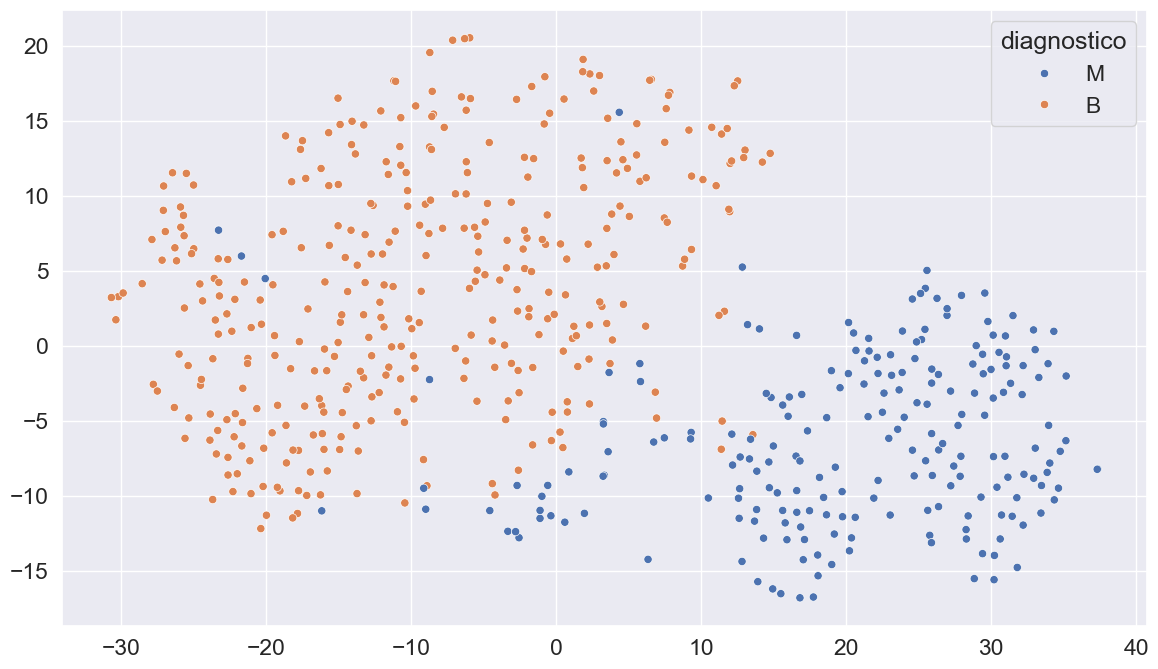

In [53]:
tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)

plt.figure(figsize=(14, 8))
sns.scatterplot(x = valores_exames_v9[:, 0], y = valores_exames_v9[:, 1], hue = diagnostico)


Em conclusão, ao aplicar técnicas como o t-SNE para redução de dimensionalidade em nossos dados, obtemos visualizações mais claras e distintas, facilitando a identificação de padrões e a determinação de fronteiras entre diferentes classes, como câncer maligno e benigno. Essas técnicas são essenciais na análise exploratória de dados e na construção de modelos de aprendizado de máquina mais eficazes.

É importante notar que a redução de dimensionalidade é uma abordagem poderosa para lidar com conjuntos de dados complexos, pois nos permite representar os dados de forma mais compacta e informativa. Enquanto a seleção de características atua como um filtro para identificar as características mais importantes, a redução de dimensionalidade transforma os dados de maneira mais abrangente, preservando as relações entre as amostras.

Portanto, ao realizar projetos de análise de dados e construção de modelos de machine learning, é fundamental considerar a aplicação de técnicas de redução de dimensionalidade para melhorar a compreensão dos dados e otimizar o desempenho dos modelos.